In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv("titanic2.csv")
bins = [0, 10, 20, 30, 50, 80,200, 600]
labels = ['0-10', '11-20', '21-30', '31-50', '51-80','81-200','201-600']
df['Fare_group'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False, include_lowest=True)
fare_group_mapping = {'0-10':1, '11-20':2, '21-30':3, '31-50':4, '51-80':5,'81-200':6,'201-600':7}
df['Fare_group'] = df['Fare_group'].map(fare_group_mapping).astype('int64')

bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_group_mapping = {'0-18': 1, '19-35': 2, '36-50': 3, '51-65': 4, '66-100': 5}
df['age_group'] = df['age_group'].map(age_group_mapping).astype('int64')

In [3]:
df.to_csv("titanic3.csv",index=False)

In [4]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_group,age_group
0,1,0,3,0,22.0,1,0,7.2500,3,1,2
1,2,1,1,1,38.0,1,0,71.2833,1,5,3
2,3,1,3,1,26.0,0,0,7.9250,3,1,2
3,4,1,1,1,35.0,1,0,53.1000,3,5,2
4,5,0,3,0,35.0,0,0,8.0500,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,0,27.0,0,0,13.0000,3,2,2
885,888,1,1,1,19.0,0,0,30.0000,3,4,2
886,889,0,3,1,60.0,1,2,23.4500,3,3,4
887,890,1,1,0,26.0,0,0,30.0000,1,4,2


In [5]:
y=df.Survived
X=df.drop(columns=['PassengerId','Survived',"Age","Fare"])

train_percentage = 0.75
train_size = int(train_percentage * len(X))
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:], y.iloc[train_size:]
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 666
Testing set size: 223


In [6]:
def print_scores(y_test,predictions_test):

    accuracy = accuracy_score(y_test, predictions_test)
    precision = precision_score(y_test, predictions_test)
    recall = recall_score(y_test, predictions_test)
    f1 = f1_score(y_test, predictions_test)

    accuracy = round(accuracy, 2)
    precision = round(precision, 2)
    recall = round(recall, 2)
    f1 = round(f1, 2)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

def Confusion_matrix(y_test,predictions_test):
    

    conf_matrix = confusion_matrix(y_test, predictions_test)
    print("Confusion Matrix:\n", conf_matrix)
    
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

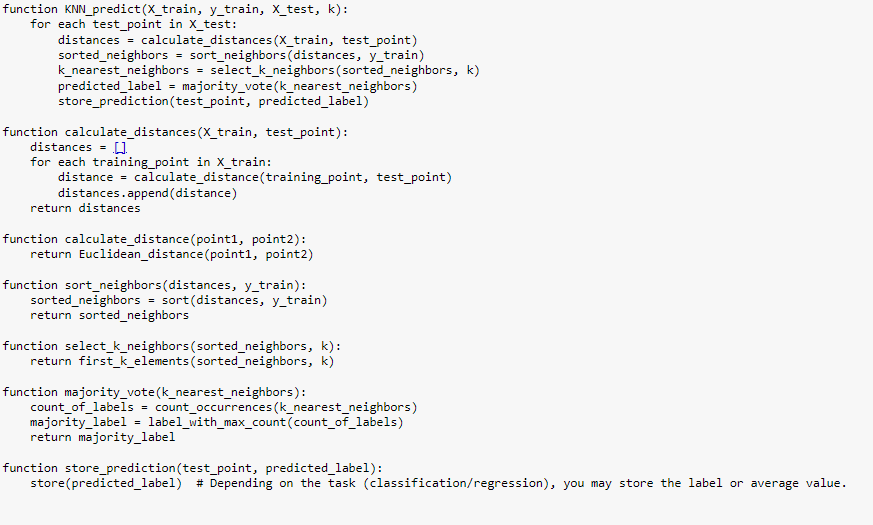

#### Euclidean Distance: 
Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).

#### Manhattan Distance: 
This is the distance between real vectors using the sum of their absolute difference.Euclidean and Manhattan Distance Formulae
#### Hamming Distance: 
It is used for categorical variables. If the value (x) and the value (y) are the same, the distance D will be equal to 0. Otherwise D=1.

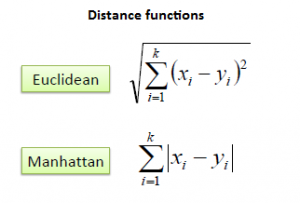

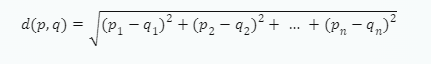

In [7]:
import numpy as np

def calculate_distances(X_train, test_point):
    numeric_columns = X_train.select_dtypes(include=[np.number]).columns
    distances = [np.linalg.norm(X_train[numeric_columns].iloc[i].values - test_point) for i in range(len(X_train))]
    return distances

def calculate_distances_vectorized(X_train, test_point):
    numeric_columns = X_train.select_dtypes(include=[np.number])
    distances = np.linalg.norm(numeric_columns.values - test_point, axis=1)
    return distances


def sort_neighbors(distances, y_train):
    sorted_neighbors = sorted(zip(distances, y_train), key=lambda x: x[0])
    return sorted_neighbors


def select_k_neighbors(sorted_neighbors, k):
    k_nearest_neighbors = [neighbor[1] for neighbor in sorted_neighbors[:k]]
    return k_nearest_neighbors

def majority_vote(k_nearest_neighbors):
    unique_labels, counts = np.unique(k_nearest_neighbors, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    return majority_label

def KNN_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test.values:

        distances = calculate_distances_vectorized(X_train, test_point)

        sorted_neighbors = sort_neighbors(distances, y_train.values)
        
        k_nearest_neighbors = select_k_neighbors(sorted_neighbors, k)
        
        predicted_label = majority_vote(k_nearest_neighbors)
        
        predictions.append(predicted_label)
        
    return predictions

In [9]:
k = 5
predictions = KNN_predict(X_train, y_train, X_test, k)


In [10]:
print(predictions)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


Confusion Matrix:
 [[125  17]
 [ 24  57]]


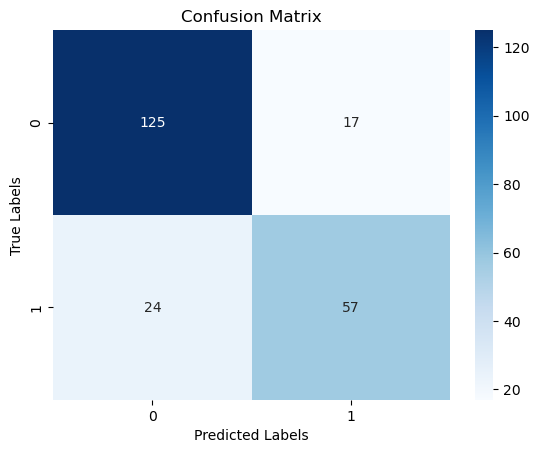

In [11]:
Confusion_matrix(y_test,predictions)

In [12]:
print_scores(y_test,predictions)

Accuracy: 0.82
Precision: 0.77
Recall: 0.7
F1 Score: 0.74


K: 1    Accuracy: 0.7802690582959642
K: 2    Accuracy: 0.7847533632286996
K: 3    Accuracy: 0.8251121076233184
K: 4    Accuracy: 0.8071748878923767
K: 5    Accuracy: 0.8161434977578476
K: 6    Accuracy: 0.8116591928251121
K: 7    Accuracy: 0.8385650224215246
K: 8    Accuracy: 0.8385650224215246
K: 9    Accuracy: 0.8430493273542601
K: 10    Accuracy: 0.8340807174887892
K: 11    Accuracy: 0.8385650224215246
K: 12    Accuracy: 0.8251121076233184
K: 13    Accuracy: 0.8161434977578476
K: 14    Accuracy: 0.8251121076233184
K: 15    Accuracy: 0.8116591928251121
K: 16    Accuracy: 0.8116591928251121
K: 17    Accuracy: 0.820627802690583
K: 18    Accuracy: 0.8071748878923767
K: 19    Accuracy: 0.8071748878923767
K: 20    Accuracy: 0.8026905829596412
K: 21    Accuracy: 0.8026905829596412
K: 22    Accuracy: 0.8026905829596412
K: 23    Accuracy: 0.8026905829596412
K: 24    Accuracy: 0.7982062780269058
K: 25    Accuracy: 0.7937219730941704
K: 26    Accuracy: 0.7802690582959642
K: 27    Accuracy: 0.7

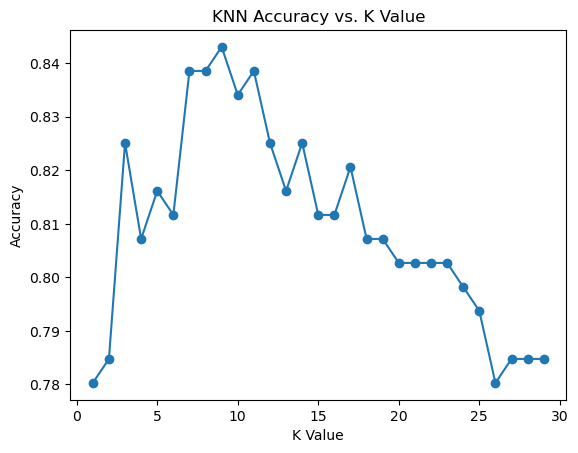

In [13]:
from sklearn.metrics import accuracy_score

k_values = range(1, 30)
accuracies = []

for k in k_values:
    predictions = KNN_predict(X_train, y_train, X_test, k)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"K: {k}    Accuracy: {accuracy}")
    accuracies.append(accuracy)

sorted_accuracies = sorted(zip(k_values, accuracies), key=lambda x: x[1], reverse=True)

accuracies_df = pd.DataFrame(sorted_accuracies, columns=['K_value', 'Accuracy'])
    
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


In [14]:
sorted_accuracies = sorted(zip(k_values, accuracies), key=lambda x: x[1], reverse=True)

accuracies_df = pd.DataFrame(sorted_accuracies, columns=['K_value', 'Accuracy'])

In [15]:
accuracies_df

,K_value,Accuracy
0,9,0.843049
1,7,0.838565
2,8,0.838565
3,11,0.838565
4,10,0.834081
5,3,0.825112
6,12,0.825112
7,14,0.825112
8,17,0.820628
9,5,0.816143


In [16]:
y_pred = KNN_predict(X_train,y_train,X_test,accuracies_df.K_value[0])

Confusion Matrix:
 [[128  14]
 [ 21  60]]


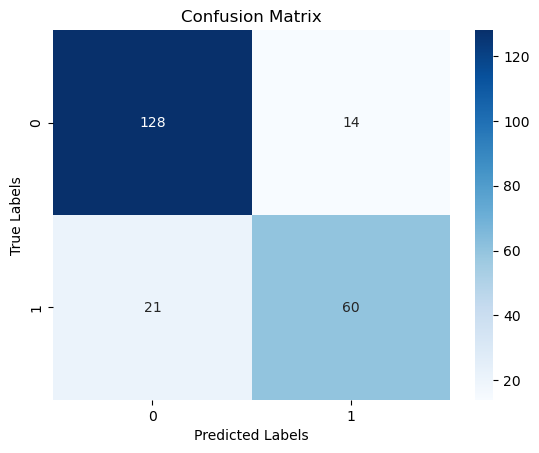

Accuracy: 0.84
Precision: 0.81
Recall: 0.74
F1 Score: 0.77


In [17]:
Confusion_matrix(y_test,y_pred)
print_scores(y_test,y_pred)

KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
)

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
    Algorithm used to compute the nearest neighbors:

    - 'ball_tree' will use :class:`BallTree`
    - 'kd_tree' will use :class:`KDTree`
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm
      based on the values passed to :meth:`fit` method.

    Note: fitting on sparse input will override the setting of
    this parameter, using brute force.

leaf_size : int, default=30
    Leaf size passed to BallTree or KDTree.  This can affect the
    speed of the construction and query, as well as the memory
    required to store the tree.  The optimal value depends on the
    nature of the problem.

p : int, default=2
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.


Confusion Matrix:
 [[126  16]
 [ 22  59]]


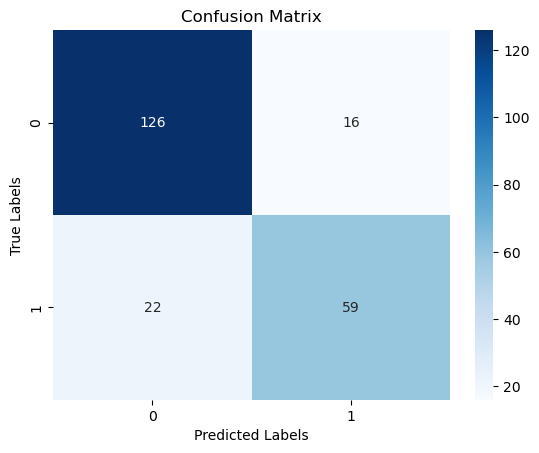

Accuracy: 0.83
Precision: 0.79
Recall: 0.73
F1 Score: 0.76


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Confusion_matrix(y_test,y_pred)
print_scores(y_test,y_pred)

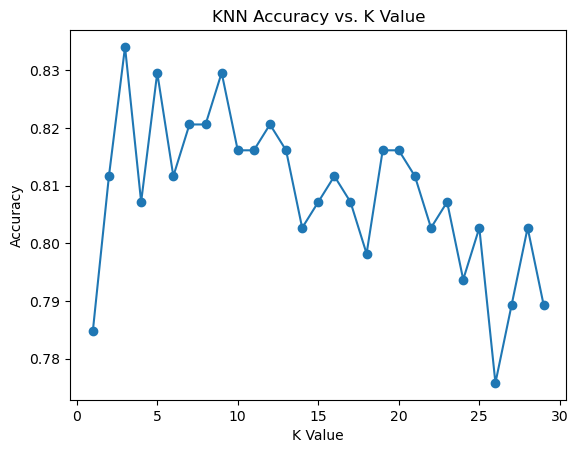

In [67]:
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()


## Elbow Method
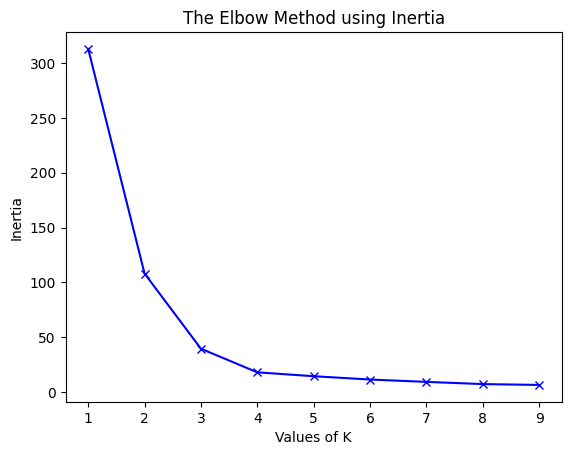

## Softmax Formula

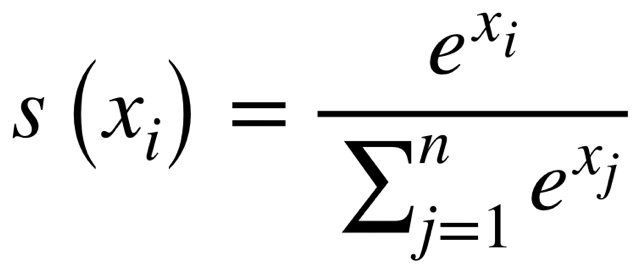

## Type-1 and Type-2 Errors
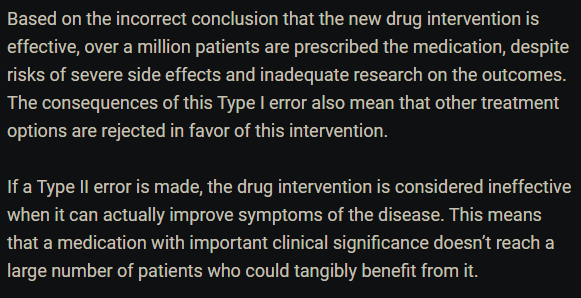